# 딥러닝 모델 성능 개선 기법
## 최적화
- train data에서 최고의 성능을 얻으려고 모델 파라미터들을 조정하는 과정(옵티마이저 역할)
- 모델을 학습하는 과정
## 모델의 성능 - 일반화, 과대적합, 과소적합
- **일반화(Generalization)**
    - 훈련된 모델이 **처음 보는 데이터**에 대해 잘 추론할 수 있는 상태
    - 학습을 통해 일반화된 특징들을 잘 찾은 상태
- **과대적합(Overfitting)**
    - 검증 결과 Train set에 대해 성능은 좋은데 Validation set에 대한 성능이 안좋은 상태로 모델이 **학습을 과하게(overfitting)**한 상태
    - 학습이 과하게 되어 쓸 데 없는 패턴을 모두 외워버려 오히려 처음본 데이터에 대한 예측 성능이 떨어짐
    - 보통 Train dataset의 크기에 비해 모델이 너무 복잡한 경우 발생함
    - 보통 과적합이라고 하면 Overfitting을 말함
- **과소적합(Underfitting)**
    - 검증 결과 Train set과 Validation set 모두 성능이 안좋은 상태로 모델의 **학습이 덜(underfitting)**된 상태
    - Train dataset의 크기에 비해 모델이 너무 단순해 데이터에 대한 특징을 다 찾지 못한 상태

![image](https://scikit-learn.org/0.15/_images/plot_underfitting_overfitting_0011.png)

## 모델 복잡도에 따른 train/test set에 대한 성능 변화
![image](https://velog.velcdn.com/images%2Fyuns_u%2Fpost%2Fc1ae12de-410b-41e1-9c46-3b9f739ac35c%2Fimage.png)

## 과소적합(Underfitting) 개선
- 모델의 복잡도를 높인다
    - 모델 네트워크의 크기를 키운다
        - Layer나 Unit 개수를 늘린다
- Epoch(또는 Step) 수를 늘린다
    - Train/Validation의 성능이 계속 좋아지는 상태에서 끝난 경우 더 학습을 시킨다

## 과대적합(Overfittign) 개선
- **더 많은 data를 수집**
    - 데이터 추가 수집
        - 일반적으로 데이터를 추가 수집해 늘리는 데 시간과 돈이 많이 들어 힘들다
    - 다양한 Up sampling 기법을 이용해 데이터를 증식시킨다
- **모델의 복잡도를 낮춰 단순한 모델을 만든다**
    - 네트워크 모델의 크기를 작게 만든다
    - 모델의 학습을 규제하는 기법을 적용한다
- **Epoch(또는 step) 수를 줄인다**
    - Validation의 성능 지표가 가장 좋았던 Epoch 까지만 학습시킨다
- #### **과대적합을 방지하기 위한 규제 방식은 모두 모델을 간단하게 만드는 방법들이다**

## Epoch과 과적합
- 데이터셋을 여러번 반복 학습을 하게 되면 초반에 train, validation 성능이 모두 개선되지만 학습이 계속 반복되면 train의 성능은 계속 좋아지지만 `어느 시점부터 Overfitting이 발생해 validation의 성능이 나빠짐`
- Epoch을 반복하는 것은 같은 데이터셋을 반복적으로 학습하는 것이기 때문에 적절한 Epoch수를 넘으면 Overfitting이 발생
- Validation set의 성능이 나빠지기 전 반복횟수를 모델의 최적 Epoch으로 선택

## DNN 모델 크기 변경
- 모델의 layer나 unit 수가 많을 수록 복잡한 모델이 됨
- Overfitting일 경우 모델을 간단하게 만들고 Underfitting일 경우 모델을 크게 만든다
    - Layer의 수, 각 layer의 unit수를 조정
- 큰 모델에서 시작하여 layer나 unit수를 줄여 validation loss의 감소 추세를 관찰

- ### **데이터에 비해 작은 모델의 특징**
    - Train/validation 성능 개선의 속도가 느림
        - 반복횟수가 충분하지 않으면 학습이 덜된 상태에서 중단될 수 있음
    - Underfitting 발생 가능성이 큼

- ### **데이터에 비해 큰 모델의 특징**
    - Vaildation 성능이 학습 초반부터 나빠짐
    - Train에 대한 성능은 빠르게 개선
    - Overfitting 발생 가능성이 큼

## Dropout Layer 추가를 통한 Overfitting 규제
- **Neural network의 Overfitting을 방지하기 위한 규제(regularization)기법**
    - Overfitting의 이유는 모델이 너무 복잡하기 때문
        - 너무 복잡한 모델은 학습시 Train dataset으로 부터 너무 많은 특징을 찾기 때문에 일반성이 떨어짐
- **Dropout Node**
    - 학습 시 일부 Unit(노들)들을 Random하게 빼고 학습, 이때 빠지는 노드들을 Dropout Node라고 함
        - 선택된 노드들의 weight들을 모두 0으로 학습시키고 이 노드들은 최적화 대상에서 빠짐
- **Dropout rate**
    - Dropout이 적용되는 Layer에서 Dropout Node의 비율로 보통 0.2 ~ 0.5를 지정
    - 너무 크게 지정하면 underfitting이 발생
- 매 step마다 Dropout Node들은 random하게 바뀜

### 효과
- Dropout은 overfitting의 원인인 co-adaptation 현상을 감소/방지하는 효과가 있음
- **co-adptation 현상이란?**
    - 학습시 생기는 오차를 줄이기 위해 네트워크 내의 모든 Node들의 모든 파라미터들이 업데이트 됨. 발생한 오차에 대해 모든 파라미터가 공동책임으로 업데이트 되는 것이 됨. 각 Node들의 역할이 나눠지지 못하고 공동화되어 이로 인해 쓸데 없는 패턴까지 학습하게 됨. 이것이 overfitting의 원인이 됨
    - Dropout을 사용하면 학습 마다 Node들을 학습에서 제외해 이런 co-adaption 현상을 줄일 수 있다
- step마다 다느 network를 학습시키는 형태가 되어 앙상블(ensemble)효과가 있다

### 적용
- Dropout은 학습시에만 적용하고 검증, 테스트, 새로운 데이터 추론시에 적용되지 않는다
- Dropout은 epoch수를 늘려주는 것이 좋음
![image](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fcr0BX4%2FbtqAQk4gc40%2FvswtXuf17Q1q4626J5FTxk%2Fimg.png)

## Batch Normalization(배치정규화)
- 각 Layer에서 출력된 값은 평균 = 0, 표준편차 = 1, 정규화 하여 **각 Layer의 입력분포를 균일하게 만든다**

### Internal Covariate Shift(내부 공변량 변화) 문제
![image](https://kjhov195.github.io/post_img/200109/image3.png)
- 내부 공변량 변화란 학습 과정에서 각 층을 통과할 때 마다 입력 데이터 분포가 달라지는 현상이다
- 입력 데이터의 분포가 정규분포를 따르더라고 레이터를 통과하면서 그 분포가 바뀌어 성능이 떨어지는 문제가 발생
- 각 레이어를 통과할 때 마다 분포를 정규분포로 정규화하여 성능을 올림
![image](https://kjhov195.github.io/post_img/200109/image4.png)
- $\gamma$: scaling 파라미터, $\beta$: shift 파라미터
    - 항상 일정한 분포로 나오는 것을 방지하기 위해 $\gamma$와  $\beta$를 이용해 분포에 약간의 변화를 준다.
    - $\gamma$와  $\beta$는 학습 과정에서 최적화 되는 값이다.
- Batch Normalization은 입력 데이터와 파라미터의 가중합을 구한 결과에 적용한 뒤 그 결고를 Activation 함수에 전달
![image](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb7IXkZ%2FbtrnBaG0tLZ%2FNmAlchsT2K3o9o5VNaQI9K%2Fimg.png)

### 효과
- 랜덤하게 생성되는 초기 가중치에 대한 영향력을 줄일 수 있음
- 학습하는 동안 과대적합에 대한 규제의 효과를 준다
- Gradient Vanishing, Gradient exploding을 막아준다

## Optimizer의 Learning rate(학습률) 조정을 통한 성능 향상
![image](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FDdw4s%2Fbtq3ubYsEPw%2FtM1o7lZJYpuKhDy8pNkQOK%2Fimg.png)
- Optimizer의 Learning rate이 너무 크거나 너무 작으면 최적의 파라미터를 찾지 못할 수 있음. 따라서 Learnig rate는 모델 성능과 밀접한 관계가 있는 주요 Hyper Parameter이다
- 학습하는 동안 고정된 하나의 Learning rate를 사용할 수 있으나 학습이 반복되는 동안 그 값을 변경하여 성능향상을 꾀할 수 있음
    - 조정하는 방법에 대한 다양한 알고리즘이 있음, 대표적인 것은 초기 Learning rate를 크게 잡아 step이 진행될 수록 줄여주는 방식이 있음

### Learning Rate Decay
- 일정한 step마다 일정한 비율로 Learning rate를 변경
- 초반에는 크게 설정하고 갈수록 줄여주는 방향으로 구현
    - 일반적으로 5 에폭마다 절반으로 줄이거나 20 에폭마다 1/10씩 줄이기도 함

### Callback을 이용한 조정
- 일정 step동안 검증 성능지표가 향상되지 않으면 그때 learning rate를 조정
> **Callback** : 학습 도중 특정 이벤트(변화)가 발생하면 호출되도록 정의한 기능

## Hyper parameter Tuning
- **Parameters**
    - 모델이 학습하여 데이터에 가장 적합한 값을 찾아내는 파라미터
        - Weights $W$
        - Bias $b$
- **Hyper parameters**
    - 모형의 구조를 결정하거나 optimization 방법을 결정하는 변수들로 개발자가 직접 설정하는 파라미터
    - Optimizer의 종류
    - learning rate($\alpha$)
    - Hidden layer의 수 
    - Hidden unit의 수 
    - Iteration의 수 
    - Activation function의 종류
    - Minibatch size 
    - Regularization
    - dropout rate
    - etc..
- 다양한 조합의 hyper parameter를 시도해 loss 함수가 빠르게 감소하는 hyper parameter를 찾아내는 시도가 필요
    

# 예제
## 프로세스
1. 데이터셋 불러오기(loading)
2. 데이터셋 전처리 작업
3. Dataset을 구성(train, validataion, test dataset)
4. 모델 구성
5. 모델 컴파일 - optimizer, loss function, metrics 설정
6. 모델 학습(training)
7. 최종 평가

In [2]:
# import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [3]:
def plot_result(hist, loss_min = None, loss_max = None):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(hist.epoch, hist.history['loss'], label='train')
    plt.plot(hist.epoch, hist.history['val_loss'], label='validation')
    plt.title('Loss')
    if loss_min != None and loss_max != None:
        plt.ylim(loss_min, loss_max)
    plt.xlabel('에폭수')
    plt.ylabel('loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(hist.epoch, hist.history['accuracy'], label='train')
    plt.plot(hist.epoch, hist.history['val_accuracy'], label='validation')
    plt.title('Accuracy')
    plt.xlabel('에폭수')
    plt.ylabel('accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [4]:
# MNIST 데이터셋 로딩
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

# 전처리 - X: scaling, y: one hot encoding 처리
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

X_train = train_image.astype('float32')/255
X_test = test_image.astype('float32')/255

print(y_train.shape, y_test.shape)
print(X_train.dtype, X_test.dtype)

(60000, 10) (10000, 10)
float32 float32


In [5]:
# 하이퍼파라미터
LEARNING_RATE = 0.001
N_EPOCH = 20
N_BATCH = 1000

In [6]:
# Dataset 생성
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(60000).batch(N_BATCH, drop_remainder = True)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCH)

print(len(train_dataset), len(test_dataset))

60 10


## 모델의 크기 변경 -> 성능 확인

In [7]:
def get_small_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(10, activation = 'softmax', name = 'output_layer'))
    
    model.compile(optimizer = optimizers.Adam(learning_rate = LEARNING_RATE),
                  loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model

In [8]:
small_model = get_small_model()
small_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 output_layer (Dense)        (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = small_model.fit(train_dataset, epochs=N_EPOCH, validation_data = test_dataset)

Epoch 1/20
60/60 [==============================] - 4s 17ms/step - loss: 1.4339 - accuracy: 0.6403 - val_loss: 0.8678 - val_accuracy: 0.8320
Epoch 2/20
60/60 [==============================] - 1s 12ms/step - loss: 0.7303 - accuracy: 0.8438 - val_loss: 0.5933 - val_accuracy: 0.8702
Epoch 3/20
60/60 [==============================] - 1s 12ms/step - loss: 0.5606 - accuracy: 0.8680 - val_loss: 0.4902 - val_accuracy: 0.8853
Epoch 4/20
60/60 [==============================] - 1s 11ms/step - loss: 0.4826 - accuracy: 0.8809 - val_loss: 0.4343 - val_accuracy: 0.8928
Epoch 5/20
60/60 [==============================] - 1s 10ms/step - loss: 0.4369 - accuracy: 0.8888 - val_loss: 0.3995 - val_accuracy: 0.8998
Epoch 6/20
60/60 [==============================] - 1s 11ms/step - loss: 0.4058 - accuracy: 0.8950 - val_loss: 0.3751 - val_accuracy: 0.9034
Epoch 7/20
60/60 [==============================] - 1s 11ms/step - loss: 0.3837 - accuracy: 0.8990 - val_loss: 0.3574 - val_accuracy: 0.9069
Epoch 8/20
60

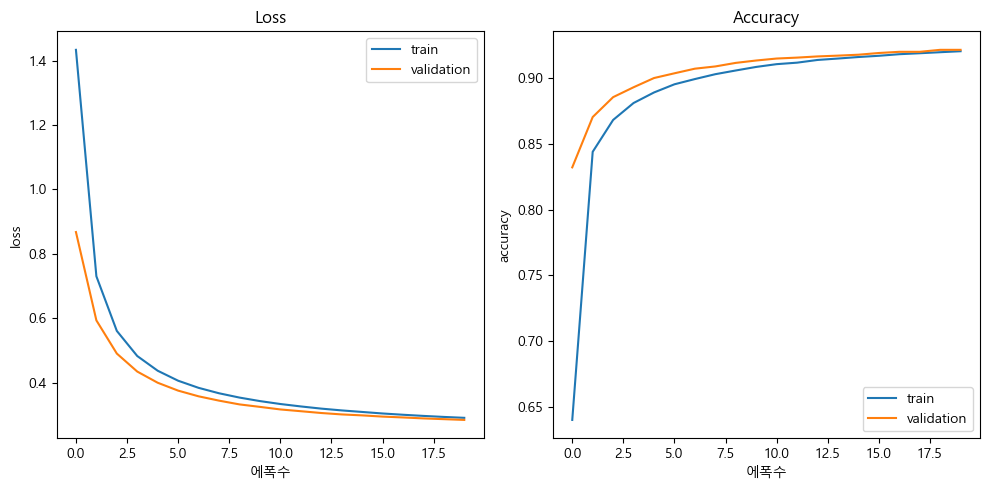

In [10]:
# 시각화
plot_result(hist)

In [15]:
def get_big_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    
    model.add(layers.Dense(10, activation='softmax', name='output_layer'))
    
    model.compile(optimizer = optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model

In [16]:
big_model = get_big_model()
big_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dense_19 (Dense)            (None, 256)               65792     
                                                                 
 dense_20 (Dense)            (None, 128)               32896     
                                                                 
 dense_21 (Dense)            (None, 128)              

In [17]:
hist = big_model.fit(train_dataset, epochs=N_EPOCH, validation_data = test_dataset)

Epoch 1/20
60/60 [==============================] - 10s 109ms/step - loss: 0.7211 - accuracy: 0.7613 - val_loss: 0.2001 - val_accuracy: 0.9390
Epoch 2/20
60/60 [==============================] - 6s 96ms/step - loss: 0.1631 - accuracy: 0.9518 - val_loss: 0.1358 - val_accuracy: 0.9596
Epoch 3/20
60/60 [==============================] - 6s 98ms/step - loss: 0.1020 - accuracy: 0.9697 - val_loss: 0.0979 - val_accuracy: 0.9691
Epoch 4/20
60/60 [==============================] - 6s 95ms/step - loss: 0.0692 - accuracy: 0.9793 - val_loss: 0.1072 - val_accuracy: 0.9669
Epoch 5/20
60/60 [==============================] - 6s 96ms/step - loss: 0.0565 - accuracy: 0.9824 - val_loss: 0.1222 - val_accuracy: 0.9619
Epoch 6/20
60/60 [==============================] - 6s 101ms/step - loss: 0.0442 - accuracy: 0.9863 - val_loss: 0.0791 - val_accuracy: 0.9764
Epoch 7/20
60/60 [==============================] - 6s 95ms/step - loss: 0.0311 - accuracy: 0.9901 - val_loss: 0.0833 - val_accuracy: 0.9761
Epoch 8/20

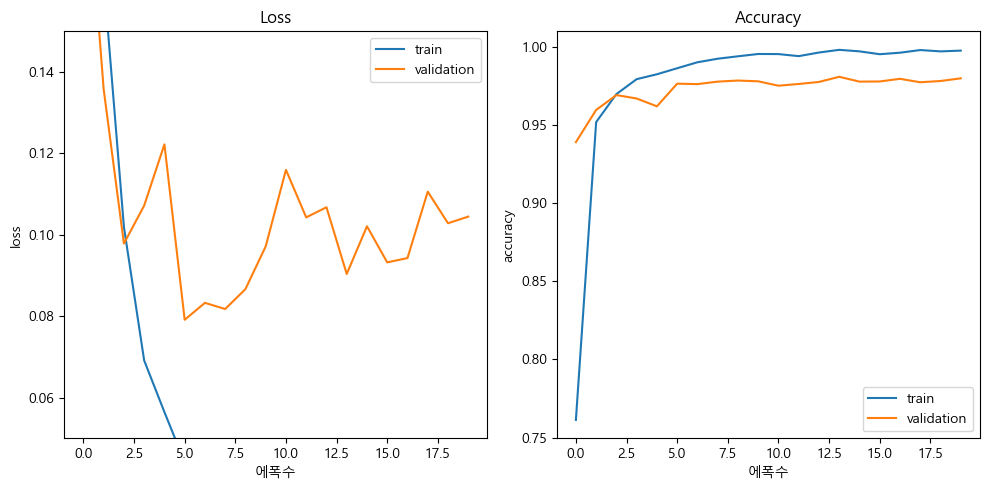

In [19]:
plot_result(hist, 0.05, 0.15)

In [20]:
print(small_model.evaluate(test_dataset))
print(big_model.evaluate(test_dataset))

10/10 [==============================] - 0s 5ms/step - loss: 0.2840 - accuracy: 0.9212
[0.28402024507522583, 0.9211999773979187]
10/10 [==============================] - 0s 46ms/step - loss: 0.1045 - accuracy: 0.9798
[0.10449077188968658, 0.9797999858856201]


## Dropout Layer
- 20번 이상의 epoch을 설정해주는 것이 좋다

In [23]:
# Dropout Layer는 Dropout을 설정하려는 Layer 앞에 먼저 정의
def get_dropout_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape = (28, 28)))
    
    model.add(layers.Dropout(rate = 0.5))
    model.add(layers.Dense(512, activation = 'relu'))
    
    model.add(layers.Dropout(rate = 0.5))
    model.add(layers.Dense(512, activation = 'relu'))
    
    model.add(layers.Dropout(rate = 0.5))
    model.add(layers.Dense(256, activation = 'relu'))
    
    model.add(layers.Dropout(rate = 0.5))
    model.add(layers.Dense(256, activation = 'relu'))
    
    model.add(layers.Dropout(rate = 0.5))
    model.add(layers.Dense(128, activation = 'relu'))
    
    model.add(layers.Dropout(rate = 0.5))
    model.add(layers.Dense(128, activation = 'relu'))
    
    model.add(layers.Dropout(rate = 0.5))
    model.add(layers.Dense(64, activation = 'relu'))
    
    model.add(layers.Dropout(rate = 0.5))
    model.add(layers.Dense(64, activation = 'relu'))
    
    model.add(layers.Dropout(rate = 0.5))
    model.add(layers.Dense(10, activation = 'softmax', name = 'output_layer'))
    
    model.compile(optimizer = optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model


In [24]:
dropout_model = get_dropout_model()
dropout_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 256)              

In [25]:
hist = dropout_model.fit(train_dataset, epochs = N_EPOCH, validation_data = test_dataset)

Epoch 1/20
60/60 [==============================] - 13s 149ms/step - loss: 2.3178 - accuracy: 0.1155 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 2/20
60/60 [==============================] - 9s 151ms/step - loss: 2.2832 - accuracy: 0.1573 - val_loss: 2.2459 - val_accuracy: 0.2060
Epoch 3/20
60/60 [==============================] - 11s 188ms/step - loss: 2.1101 - accuracy: 0.2143 - val_loss: 2.0800 - val_accuracy: 0.2400
Epoch 4/20
60/60 [==============================] - 9s 143ms/step - loss: 1.9650 - accuracy: 0.2291 - val_loss: 1.9283 - val_accuracy: 0.3149
Epoch 5/20
60/60 [==============================] - 9s 147ms/step - loss: 1.8049 - accuracy: 0.2991 - val_loss: 1.6877 - val_accuracy: 0.3538
Epoch 6/20
60/60 [==============================] - 10s 163ms/step - loss: 1.6742 - accuracy: 0.3584 - val_loss: 1.5976 - val_accuracy: 0.3811
Epoch 7/20
60/60 [==============================] - 10s 164ms/step - loss: 1.5448 - accuracy: 0.4160 - val_loss: 1.3181 - val_accuracy: 0.5026
Ep

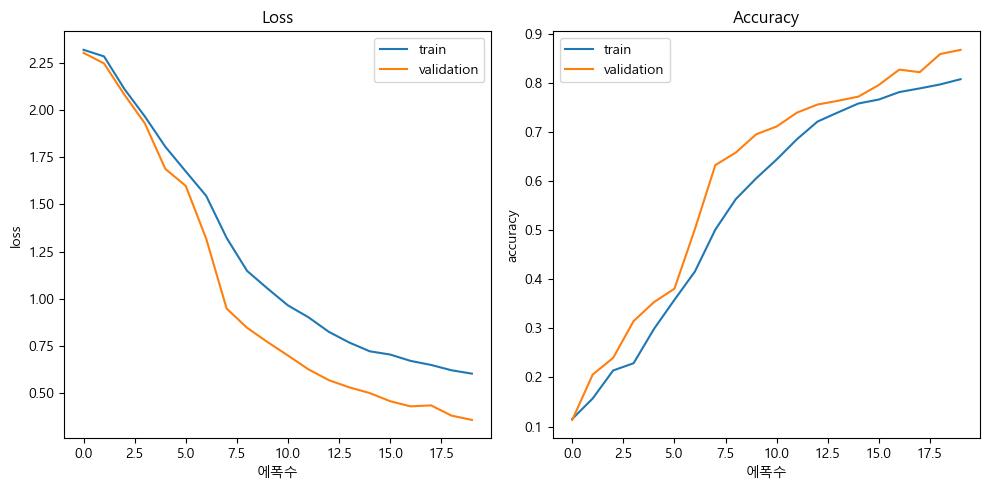

In [26]:
plot_result(hist)

## Batch Noramlization 예제

In [27]:
def get_model_bn(lr = 0.01):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    
    model.add(layers.Dense(256))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(256))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(128))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(128))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(10))
    model.add(layers.Softmax())

    model.compile(optimizer = optimizers.Adam(learning_rate = lr),
                  loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model    

In [28]:
model_bn = get_model_bn(LEARNING_RATE)
model_bn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_33 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [29]:
hist = model_bn.fit(train_dataset, epochs=N_EPOCH, validation_data = test_dataset)

Epoch 1/20
60/60 [==============================] - 6s 46ms/step - loss: 0.4166 - accuracy: 0.8834 - val_loss: 0.9209 - val_accuracy: 0.9300
Epoch 2/20
60/60 [==============================] - 3s 43ms/step - loss: 0.1088 - accuracy: 0.9695 - val_loss: 0.3760 - val_accuracy: 0.9517
Epoch 3/20
60/60 [==============================] - 3s 42ms/step - loss: 0.0616 - accuracy: 0.9840 - val_loss: 0.1838 - val_accuracy: 0.9594
Epoch 4/20
60/60 [==============================] - 3s 45ms/step - loss: 0.0352 - accuracy: 0.9914 - val_loss: 0.1047 - val_accuracy: 0.9732
Epoch 5/20
60/60 [==============================] - 3s 42ms/step - loss: 0.0211 - accuracy: 0.9958 - val_loss: 0.0801 - val_accuracy: 0.9769
Epoch 6/20
60/60 [==============================] - 3s 41ms/step - loss: 0.0124 - accuracy: 0.9984 - val_loss: 0.0729 - val_accuracy: 0.9791
Epoch 7/20
60/60 [==============================] - 3s 41ms/step - loss: 0.0074 - accuracy: 0.9992 - val_loss: 0.0710 - val_accuracy: 0.9791
Epoch 8/20
60

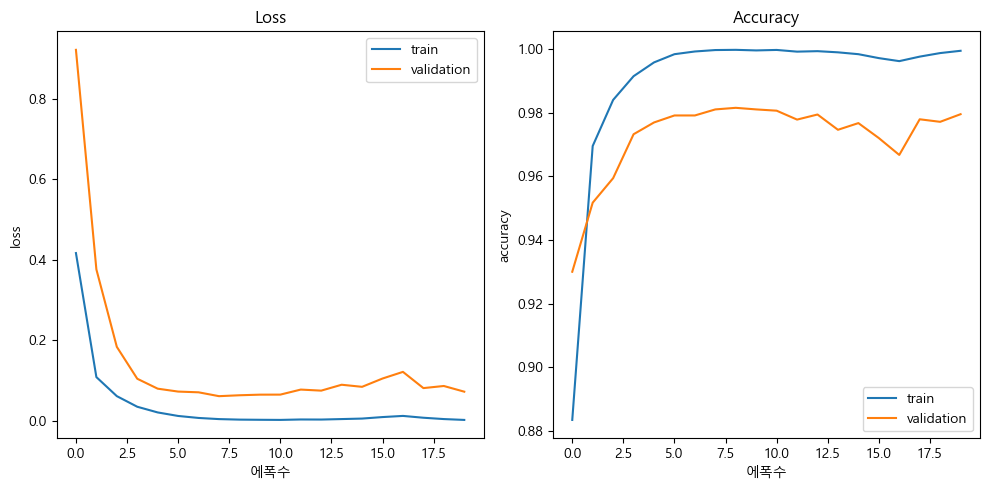

In [30]:
plot_result(hist)

## Learning Rate 변화를 통한 성능개선
### Learning Rate scheduler를 이용
- 특정 step 마다 learning rate를 변경

In [31]:
lr_scheduler = optimizers.schedules.ExponentialDecay(
    initial_learning_rate = LEARNING_RATE,
    decay_steps = len(train_dataset)*5, 
    decay_rate = 0.5,
    staircase = True
)

In [32]:
def get_model_lr(initial_lr = 0.01):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax', name='output_layer'))
    
    lr_sch = optimizers.schedules.ExponentialDecay(initial_learning_rate=initial_lr,
                                                   decay_steps=len(train_dataset)*5,
                                                   decay_rate=0.5,
                                                   staircase=True)
    model.compile(optimizer=optimizers.Adam(learning_rate=lr_sch),
                  loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model

In [33]:
model_lr = get_model_lr(LEARNING_RATE)
hist = model_lr.fit(train_dataset, epochs=N_EPOCH, validation_data = test_dataset)

Epoch 1/20
60/60 [==============================] - 4s 38ms/step - loss: 0.6573 - accuracy: 0.8174 - val_loss: 0.2475 - val_accuracy: 0.9285
Epoch 2/20
60/60 [==============================] - 2s 27ms/step - loss: 0.2042 - accuracy: 0.9400 - val_loss: 0.1620 - val_accuracy: 0.9517
Epoch 3/20
60/60 [==============================] - 2s 28ms/step - loss: 0.1418 - accuracy: 0.9588 - val_loss: 0.1216 - val_accuracy: 0.9634
Epoch 4/20
60/60 [==============================] - 2s 30ms/step - loss: 0.1092 - accuracy: 0.9681 - val_loss: 0.1098 - val_accuracy: 0.9659
Epoch 5/20
60/60 [==============================] - 2s 28ms/step - loss: 0.0879 - accuracy: 0.9741 - val_loss: 0.0983 - val_accuracy: 0.9696
Epoch 6/20
60/60 [==============================] - 2s 25ms/step - loss: 0.0672 - accuracy: 0.9808 - val_loss: 0.0848 - val_accuracy: 0.9739
Epoch 7/20
60/60 [==============================] - 2s 30ms/step - loss: 0.0595 - accuracy: 0.9832 - val_loss: 0.0809 - val_accuracy: 0.9750
Epoch 8/20
60

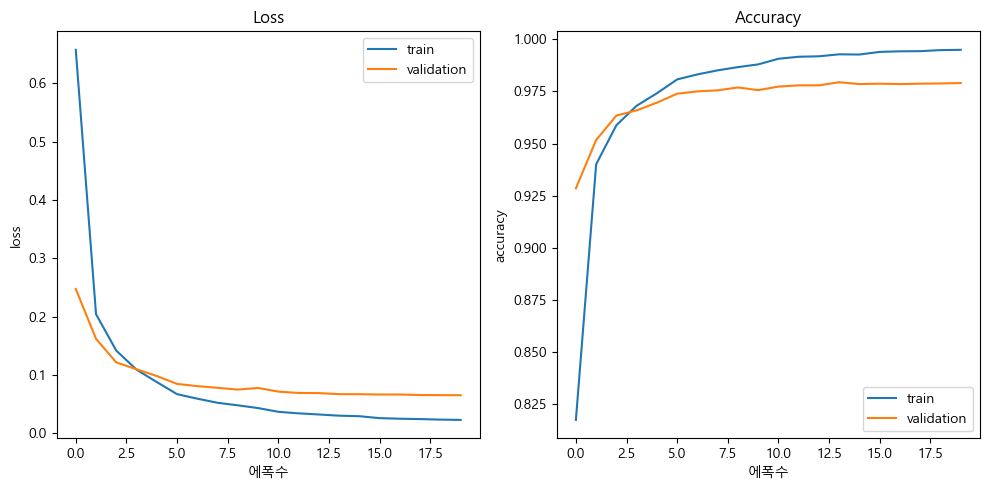

In [35]:
plot_result(hist)

## callback을 이용해 학습률 변경
- ReduceLROnPlateau callback을 이용

In [36]:
tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                     factor=0.5,
                                     patience=5,
                                     mode='auto'
                                     )

In [37]:
def get_model_lr2(inital_lr = 0.01):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax', name='output_layer'))
    
    model.compile(optimizer = optimizers.Adam(learning_rate=inital_lr),
                  loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model

In [38]:
model_lr2 = get_model_lr2(LEARNING_RATE)

In [39]:
lr_callback = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                factor=0.5,
                                                patience=3,
                                                verbose=2
                                                )
hist = model_lr2.fit(train_dataset, epochs=N_EPOCH+10, validation_data = test_dataset,
                     callbacks=[lr_callback])

Epoch 1/30
60/60 [==============================] - 4s 35ms/step - loss: 0.6629 - accuracy: 0.8176 - val_loss: 0.2374 - val_accuracy: 0.9304 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 2s 28ms/step - loss: 0.2027 - accuracy: 0.9409 - val_loss: 0.1639 - val_accuracy: 0.9519 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 2s 28ms/step - loss: 0.1416 - accuracy: 0.9585 - val_loss: 0.1379 - val_accuracy: 0.9592 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 2s 26ms/step - loss: 0.1127 - accuracy: 0.9667 - val_loss: 0.1161 - val_accuracy: 0.9647 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 2s 25ms/step - loss: 0.0863 - accuracy: 0.9748 - val_loss: 0.0956 - val_accuracy: 0.9707 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 2s 29ms/step - loss: 0.0707 - accuracy: 0.9792 - val_loss: 0.1016 - val_accuracy: 0.9691 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 2s 31ms/step - loss: 0.0

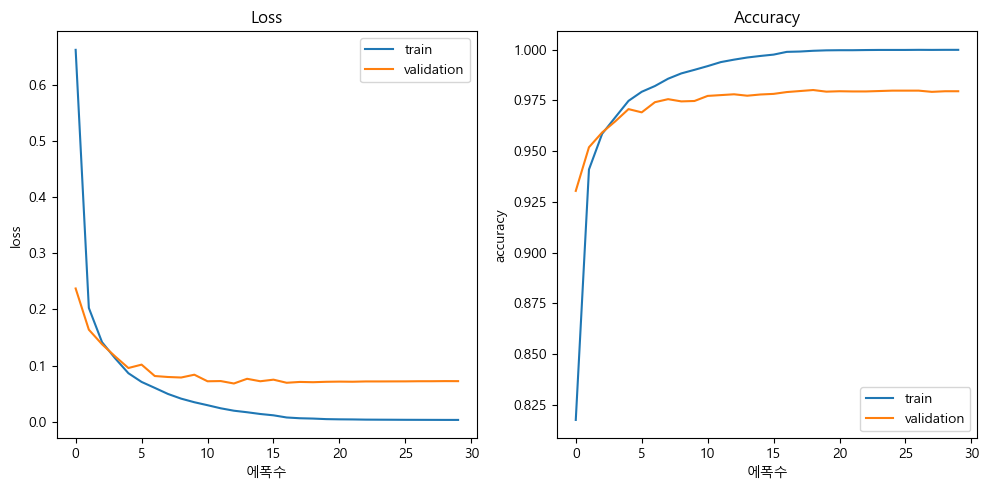

In [40]:
plot_result(hist)